> # Covid 19 Analysis

In [73]:
# importing libraries
import pandas as pd 
import missingno as msno
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo # to run plotly in offline mode
pyo.init_notebook_mode(connected=True) # Required to run plotly in Jupyter Notebook

from plotly.figure_factory import create_table

>## importing the datasets

In [76]:
covid = pd.read_csv('./Data/covid.csv')
print(covid.shape)
covid.head()

(209, 17)


Country/Region      Continent    Population  TotalCases  NewCases  \
0            USA  North America  3.311981e+08     5032179       NaN   
1         Brazil  South America  2.127107e+08     2917562       NaN   
2          India           Asia  1.381345e+09     2025409       NaN   
3         Russia         Europe  1.459409e+08      871894       NaN   
4   South Africa         Africa  5.938157e+07      538184       NaN   

   TotalDeaths  NewDeaths  TotalRecovered  NewRecovered  ActiveCases  \
0     162804.0        NaN       2576668.0           NaN    2292707.0   
1      98644.0        NaN       2047660.0           NaN     771258.0   
2      41638.0        NaN       1377384.0           NaN     606387.0   
3      14606.0        NaN        676357.0           NaN     180931.0   
4       9604.0        NaN        387316.0           NaN     141264.0   

   Serious,Critical  Tot Cases/1M pop  Deaths/1M pop  TotalTests  \
0           18296.0           15194.0          492.0  63139605.0   
1            8318.0           13716.0          464.0  13206188.0   
2            8944.0            1466.0           30.0  22149351.0   
3            2300.0            5974.0          100.0  29716907.0   
4             539.0            9063.0          162.0   3149807.0   

   Tests/1M pop      WHO Region iso_alpha  
0      190640.0        Americas       USA  
1       62085.0        Americas       BRA  
2       16035.0  South-EastAsia       IND  
3      203623.0          Europe       RUS  
4       53044.0          Africa       ZAF

In [38]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country/Region    209 non-null    object 
 1   Continent         208 non-null    object 
 2   Population        208 non-null    float64
 3   TotalCases        209 non-null    int64  
 4   NewCases          4 non-null      float64
 5   TotalDeaths       188 non-null    float64
 6   NewDeaths         3 non-null      float64
 7   TotalRecovered    205 non-null    float64
 8   NewRecovered      3 non-null      float64
 9   ActiveCases       205 non-null    float64
 10  Serious,Critical  122 non-null    float64
 11  Tot Cases/1M pop  208 non-null    float64
 12  Deaths/1M pop     187 non-null    float64
 13  TotalTests        191 non-null    float64
 14  Tests/1M pop      191 non-null    float64
 15  WHO Region        184 non-null    object 
 16  iso_alpha         209 non-null    object 
dt

>  dataset contains 209 rows and 17 columns, with information on COVID-19 cases, deaths, recoveries, tests, and population-related statistics for different countries.

<Axes: >

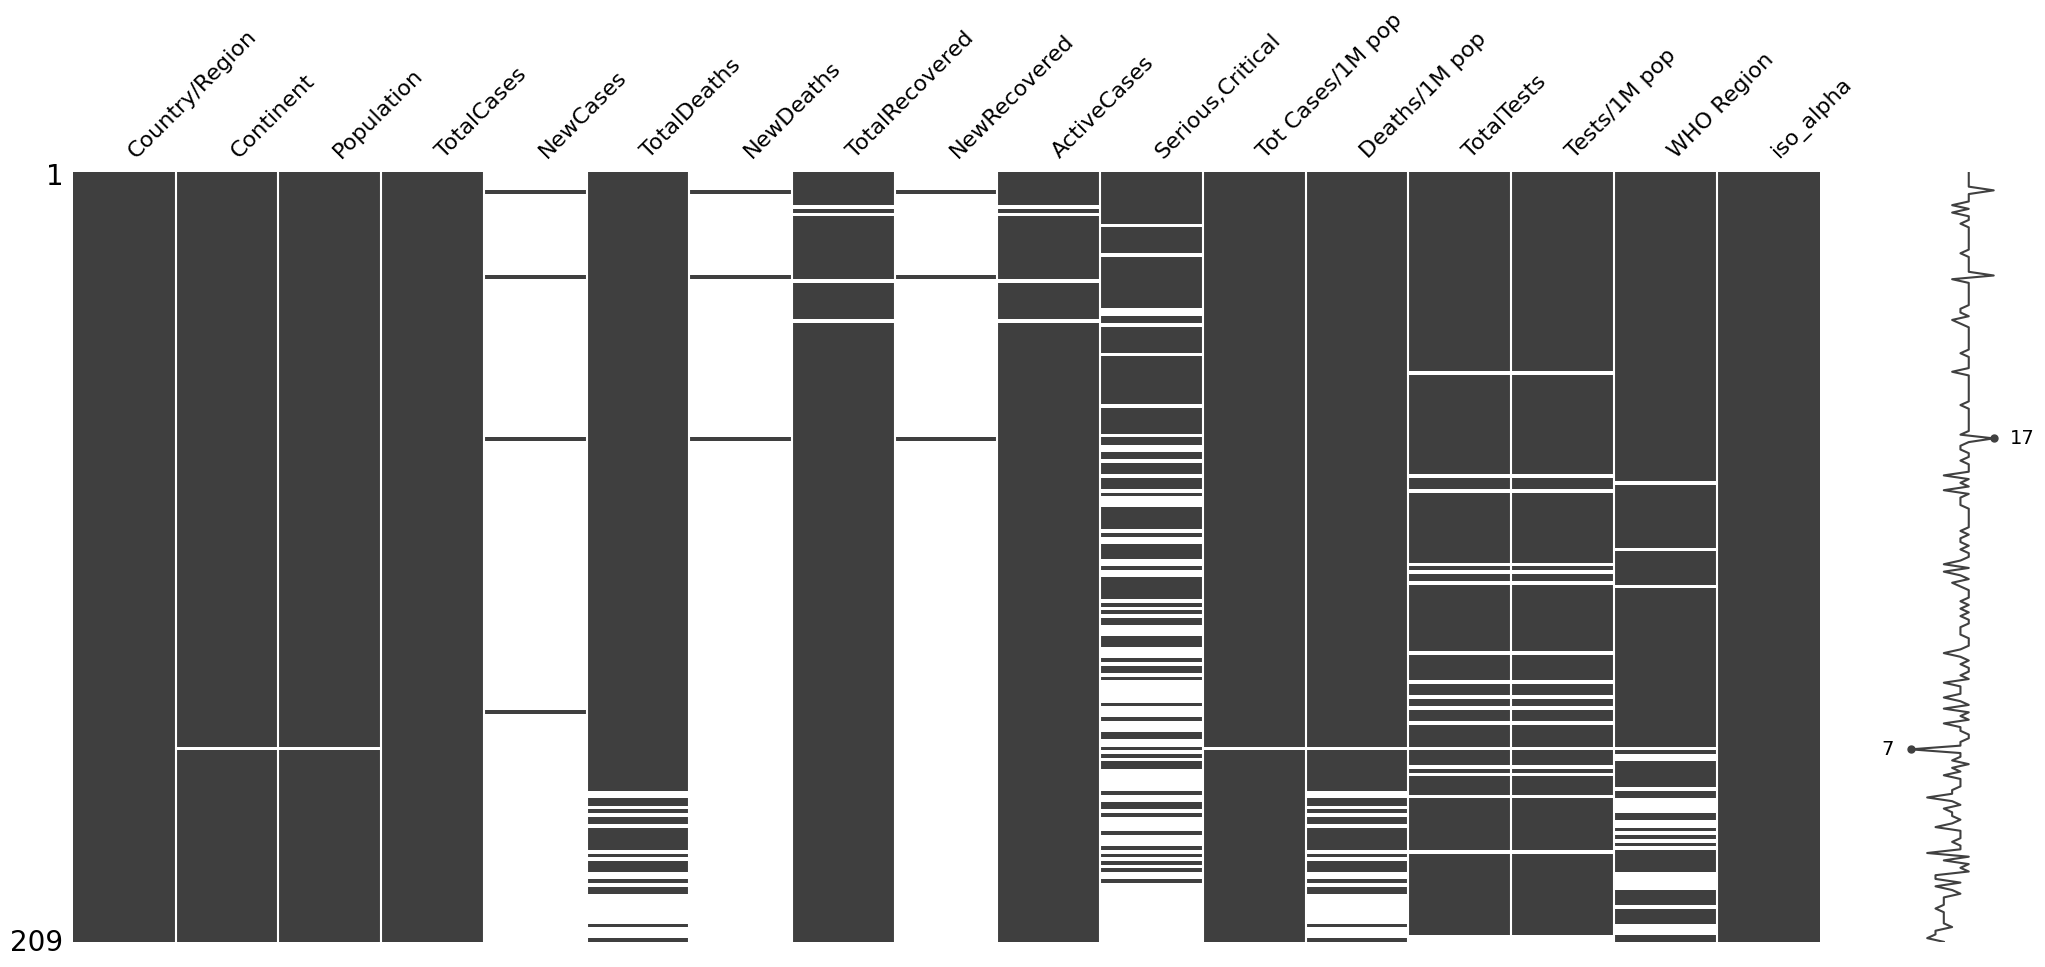

In [77]:
msno.matrix(covid)

In [78]:
# let's drop the 'New cases' and 'New deaths', and 'New Recovered' columns because of the missing values

covid.drop(columns=['NewCases', 'NewDeaths', 'NewRecovered'], inplace=True)

> ### **now we will explore how to create a table using plotly express**


In [41]:
table = create_table(covid.head(15))
pyo.iplot(table)


>### Global COVID-19 Cases & Deaths Map

In [79]:
px.choropleth(
    covid, 
    locations="iso_alpha", 
    color="TotalCases", 
    hover_name="Country/Region", 
    title="Global COVID-19 Cases Distribution",
    color_continuous_scale="Reds",
    projection="natural earth"
)

In [80]:
px.choropleth(
    covid, 
    locations="iso_alpha", 
    color="TotalDeaths", 
    hover_name="Country/Region", 
    title="Global COVID-19 Death Distribution",
    color_continuous_scale="Reds",
    projection="natural earth"
)

> ## Top 10 Countries with the most COVID-19 cases

In [81]:
top10 = covid.nlargest(10, 'TotalCases')
px.bar(
    top10,
    x='Country/Region',
    y = ['TotalCases', 'TotalDeaths'],
    title='Top 10 Countries with Highest COVID-19 Cases and Deaths',
    barmode="group"
)

> ## Cases vs. Deaths Correlation

In [89]:
fig_scatter = px.scatter(
    covid, 
    x="TotalCases", 
    y="TotalDeaths", 
    size="Population", 
    hover_name="Country/Region",
    title="COVID-19 Cases vs. Deaths Correlation",
    color="Continent",
    size_max=50,
    
)
fig_scatter.show()

> ## COVID-19 Impact by Continent

In [90]:
continent_data = covid.groupby('Continent')[['TotalCases', 'TotalDeaths', 'TotalRecovered']].sum().reset_index()
continent_data

Continent  TotalCases  TotalDeaths  TotalRecovered
0             Africa     1011867      22114.0        693620.0
1               Asia     4689794     100627.0       3508170.0
2  Australia/Oceania       21735        281.0         12620.0
3             Europe     2982576     205232.0       1587302.0
4      North America     5919209     229855.0       3151678.0
5      South America     4543273     154885.0       3116150.0

In [91]:
px.bar(
    continent_data,
    x='Continent',
    y=['TotalCases', 'TotalDeaths', 'TotalRecovered'],
    title='COVID-19 impact by Continent',
    barmode='group'
)

> ## Testing vs. Cases Analysis

In [93]:
px.scatter(
    covid, 
    x="TotalTests", 
    y="TotalCases", 
    size="Population", 
    hover_name="Country/Region",
    title="Testing vs. COVID-19 Cases",
    color="Continent"
)

In [95]:
covid_grouped = pd.read_csv('./Data/covid_grouped.csv')
covid_grouped.head()

Date Country/Region  Confirmed  Deaths  Recovered  Active  New cases  \
0  2020-01-22    Afghanistan          0       0          0       0          0   
1  2020-01-22        Albania          0       0          0       0          0   
2  2020-01-22        Algeria          0       0          0       0          0   
3  2020-01-22        Andorra          0       0          0       0          0   
4  2020-01-22         Angola          0       0          0       0          0   

   New deaths  New recovered             WHO Region iso_alpha  
0           0              0  Eastern Mediterranean       AFG  
1           0              0                 Europe       ALB  
2           0              0                 Africa       DZA  
3           0              0                 Europe       AND  
4           0              0                 Africa       AGO

In [96]:
px.choropleth(covid_grouped,
              locations="iso_alpha",
              color="Confirmed",
              hover_name="Country/Region", 
              color_continuous_scale="Blues",
              animation_frame="Date")

In [99]:
px.bar(covid_grouped, x="WHO Region", y="Confirmed", color="WHO Region", 
       animation_frame="Date", hover_name="Country/Region")